### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
import warnings
warnings.filterwarnings('ignore')

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [4]:
import pandas as pd
df = pd.read_csv('vehicle.csv')

In [6]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

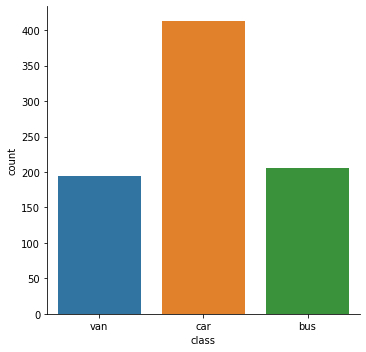

In [17]:
sns.catplot(x='class', kind= 'count', data=df)

### Check for any missing values in the data 

In [18]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [20]:
from scipy.stats import zscore

In [21]:
df1 = df.drop(columns='class', axis=1)
df1.head(2)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199


In [28]:
df1_z = df1.apply(zscore)
df1_z.head(2)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318


### K - Means Clustering

### 4. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

In [69]:
dist = {}

### 5. Calculating distortion - C distance

In [65]:
from sklearn.cluster import KMeans

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [70]:
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df1_z)
    dist[k] = kmeans.inertia_

### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

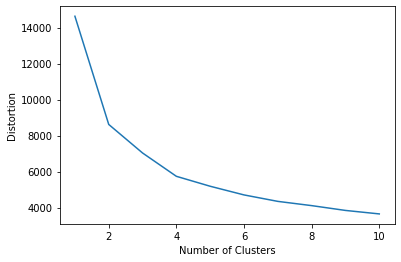

In [72]:
sns.lineplot(x = list(dist.keys()), y = list(dist.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

### Find out the optimal value of K

In [87]:
print ('From the Elbow plot Optimal Value of K is 4')

From the Elbow plot Optimal Value of K is 4


### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df1_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [82]:
arr_cent = kmeans.cluster_centers_

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [83]:
arr_cent

array([[-9.15758407e-01, -5.22402678e-01, -8.89505987e-01,
        -1.08772789e+00, -5.61970783e-01, -3.00015871e-01,
        -7.79778853e-01,  8.67364185e-01, -7.45939378e-01,
        -4.85536418e-01, -8.01746438e-01, -7.83836827e-01,
        -3.90574645e-01,  7.83159216e-01, -9.02385712e-02,
        -2.96089665e-01, -1.04774549e+00, -1.10361198e+00],
       [ 1.15442786e+00,  1.18428647e+00,  1.21198691e+00,
         9.73321772e-01,  9.49213388e-02,  2.18659142e-01,
         1.29796844e+00, -1.21424667e+00,  1.30184458e+00,
         1.09830595e+00,  1.20590258e+00,  1.30898668e+00,
         1.09121291e+00, -1.07878646e-01,  1.68326262e-01,
         2.67954844e-01,  4.67043879e-03,  1.90327006e-01],
       [-2.28397024e-01, -5.77112825e-01, -3.08062421e-01,
        -4.12415311e-02,  1.78444965e-01, -1.73698681e-01,
        -4.56879712e-01,  3.21990722e-01, -4.85591783e-01,
        -5.39969043e-01, -4.21528655e-01, -4.61480779e-01,
        -6.05499266e-01, -6.42849115e-01, -6.23412553e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [84]:
centroids = pd.DataFrame(columns = df1_z.columns, data = arr_cent )
centroids

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.915758,-0.522403,-0.889506,-1.087728,-0.561971,-0.300016,-0.779779,0.867364,-0.745939,-0.485536,-0.801746,-0.783837,-0.390575,0.783159,-0.090239,-0.296090,-1.047745,-1.103612
1,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
2,-0.228397,-0.577113,-0.308062,-0.041242,0.178445,-0.173699,-0.456880,0.321991,-0.485592,-0.539969,-0.421529,-0.461481,-0.605499,-0.642849,-0.062341,0.012963,0.822192,0.705383
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [85]:
kmeans.labels_

array([2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 3, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 3, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 3, 0, 2, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2,
       1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0,
       2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 0, 2, 3, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,

In [94]:
labels_df = pd.DataFrame(columns=['class_label'], data=kmeans.labels_)
print(labels_df.groupby('class_label').agg({'class_label':'count'}))

             class_label
class_label             
0                    239
1                    256
2                    310
3                      8


In [97]:
df['class_label'] = labels_df
df.head(5).T

,0,1,2,3,4
compactness,95,91,104,93,85
circularity,48,41,50,41,44
distance_circularity,83,84,106,82,70
radius_ratio,178,141,209,159,205
pr.axis_aspect_ratio,72,57,66,63,103
max.length_aspect_ratio,10,9,10,9,52
scatter_ratio,162,149,207,144,149
elongatedness,42,45,32,46,45
pr.axis_rectangularity,20,19,23,19,19
max.length_rectangularity,159,143,158,143,144


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [91]:
import numpy as np

In [92]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [104]:
final_df = pd.DataFrame(data=a)
final_df = final_df.append(pd.DataFrame(data=b))
final_df = final_df.append(pd.DataFrame(data=c))
final_df.head()

,0,1
0,13.009679,-0.649615
1,9.252411,2.312749
2,11.643381,1.001612
3,9.553205,-1.174333
4,7.316829,0.425493


### 10. Use scatter matrix to print all the 3 distributions

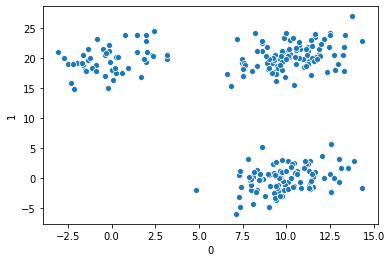

In [116]:
sns.scatterplot(x= 0 , y= 1 , data=final_df)

### 11. Find out the linkage matrix

In [117]:
import scipy.cluster.hierarchy as shc
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [118]:
shc1 = shc.linkage(final_df.values, method='ward')

In [120]:
shc1

array([[4.10000000e+01, 9.90000000e+01, 2.79994624e-02, 2.00000000e+00],
       [1.62000000e+02, 1.63000000e+02, 3.55098777e-02, 2.00000000e+00],
       [1.80000000e+02, 2.17000000e+02, 6.09716493e-02, 2.00000000e+00],
       [1.85000000e+02, 2.21000000e+02, 6.25201534e-02, 2.00000000e+00],
       [5.00000000e+01, 5.20000000e+01, 6.37069027e-02, 2.00000000e+00],
       [3.30000000e+01, 8.10000000e+01, 6.63656600e-02, 2.00000000e+00],
       [2.20000000e+01, 7.50000000e+01, 7.45501123e-02, 2.00000000e+00],
       [1.67000000e+02, 1.96000000e+02, 7.79514000e-02, 2.00000000e+00],
       [1.61000000e+02, 1.68000000e+02, 8.90506064e-02, 2.00000000e+00],
       [1.99000000e+02, 2.23000000e+02, 9.34662951e-02, 2.00000000e+00],
       [2.10000000e+01, 2.70000000e+01, 9.43155230e-02, 2.00000000e+00],
       [4.70000000e+01, 6.50000000e+01, 1.06033240e-01, 2.00000000e+00],
       [1.50000000e+01, 9.00000000e+01, 1.32580443e-01, 2.00000000e+00],
       [4.90000000e+01, 5.40000000e+01, 1.34453797e

### 12. Plot the dendrogram for the consolidated dataframe

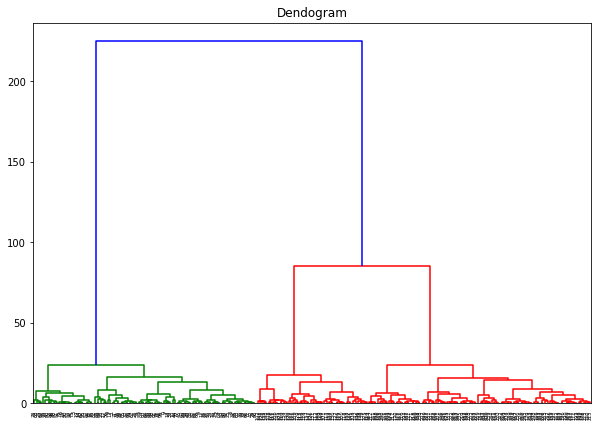

In [119]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc1)

### 13. Recreate the dendrogram for last 12 merged clusters 

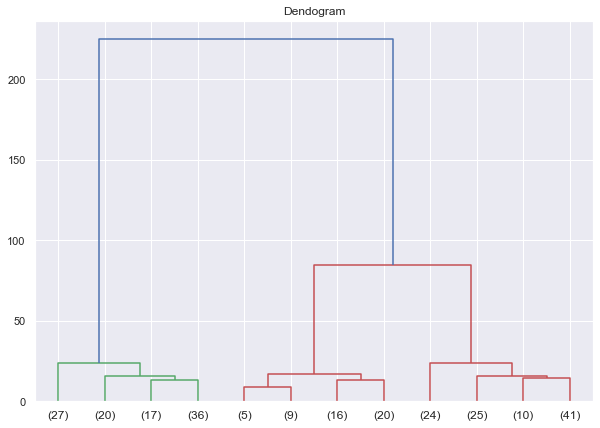

In [128]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc1, truncate_mode='lastp', p=12)

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. Using this distance measure and AgglomerativeClustering() function to cluster the data into 3 different groups

In [122]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3)

In [124]:
final_df['Cluster_3'] = ac.fit_predict(final_df.values)

In [127]:
final_df['Cluster_3'].value_counts()

1    100
0    100
2     50
Name: Cluster_3, dtype: int64

### 15. Use matplotlib to visually observe the clusters in 2D space 

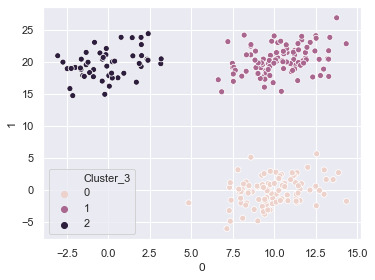

In [126]:
sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.scatterplot(x=final_df[0], y=final_df[1], hue=final_df['Cluster_3'])